## Name: Boniface Delali Dakey
## ID: 10969344

In my role as a data analyst at a beverage manufacturing company, I was given a large and detailed dataset containing all inventories of red wine. My main task was to conduct exploratory data analysis on this dataset and then present my insights to investors during the annual end-of-year meeting. In this report, I will be sharing my observations and findings based on the dataset that was entrusted to me.

# TASKS

> ## Pre-process data to get rid of all null values and duplicates.
### Data Pre-Processing:
The first step is to identify any duplicates and null values in the dataset. If duplicates exist, they will be removed. If null values are present, the appropriate handling method will be determined based on the nature of the data. If the null values are a small percentage of the dataset, they may be dropped or imputed.

If missing data needs to be imputed, the chosen method will be explained, along with the rationale behind it. In some cases, imputing missing data is reasonable, especially if the missing data is a small percentage of the overall dataset. Imputing missing data can help to prevent the loss of valuable information and make the dataset more balanced.

Step 1: Import the necessary libraries

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [6]:
df = pd.read_csv('data.csv')

Check for duplicates and null values

In [7]:
print(df.duplicated().sum())  # Check for duplicates
print(df.drop_duplicates(inplace=True))  # Drop duplicates
print(df.isnull().sum())  # Check for null values
print(df.dropna(inplace=True))  # Drop rows with null values

0
None
ID                      0
fixed acidity           1
volatile acidity        0
citric acid             1
residual sugar          0
chlorides               3
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64
None


> ## Show statistical inferences of your entire dataset

Perform statistical analyses of the entire dataset

In [8]:
# Filling null values in the residual sugar series with mean
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)

### Summary statistics of the dataset

In [10]:
df.describe()  # Summary statistics of the dataset

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,801.060968,8.320616,0.527681,0.271477,2.540761,0.087500,15.861722,46.498429,0.996747,3.311358,0.658611,10.426053,5.637964
std,460.740942,1.740134,0.179045,0.194807,1.413076,0.047175,10.429385,32.998659,0.001889,0.154548,0.169786,1.066706,0.807772
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,402.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot: xlabel='residual sugar', ylabel='Count'>

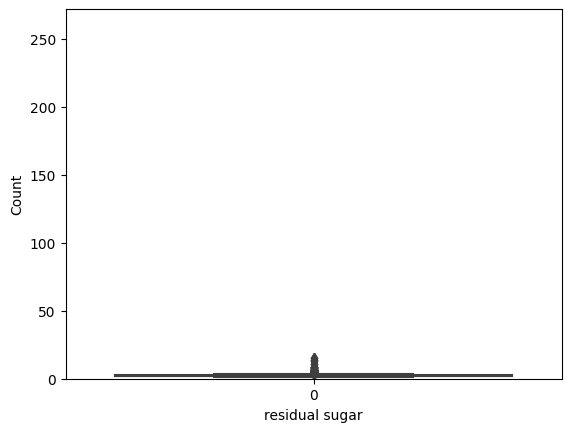

In [12]:
sns.histplot(df['residual sugar'])  # Distribution of residual sugar
sns.boxplot(df['residual sugar'])  # Boxplot of residual sugar

count    1591.000000
mean      801.060968
std       460.740942
min         1.000000
25%       402.500000
50%       801.000000
75%      1199.500000
max      1601.000000
Name: ID, dtype: float64
count    1591.000000
mean        8.320616
std         1.740134
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64
count    1591.000000
mean        0.527681
std         0.179045
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64
count    1591.000000
mean        0.271477
std         0.194807
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64
count    1591.000000
mean        2.540761
std         1.413076
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtyp

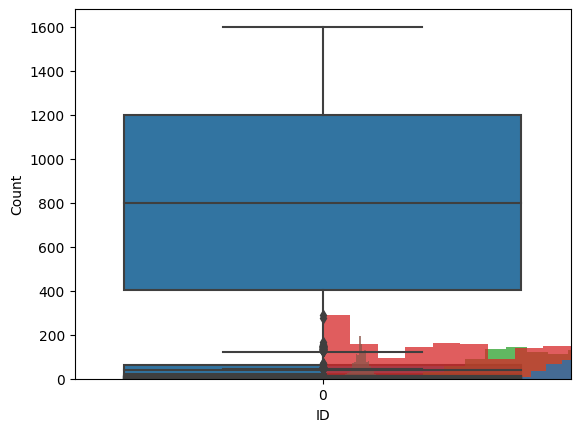

In [17]:
for i in df.columns:
    print(df[i].describe())
    sns.histplot(df[i])  # Distribution of price
    sns.boxplot(df[i])  # Boxplot of year column

Text(0.5, 1.0, "Alcohol's histogram")

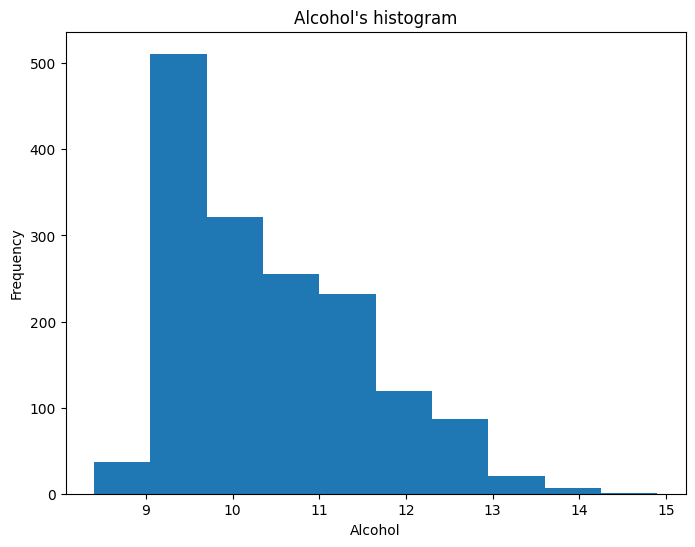

In [18]:
# Histogram of a numerical column
plt.figure(figsize=(8,6)) # set the figure size
plt.hist(df['alcohol'])
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.title('Alcohol\'s histogram')

> ### Pie chart of a categorical column

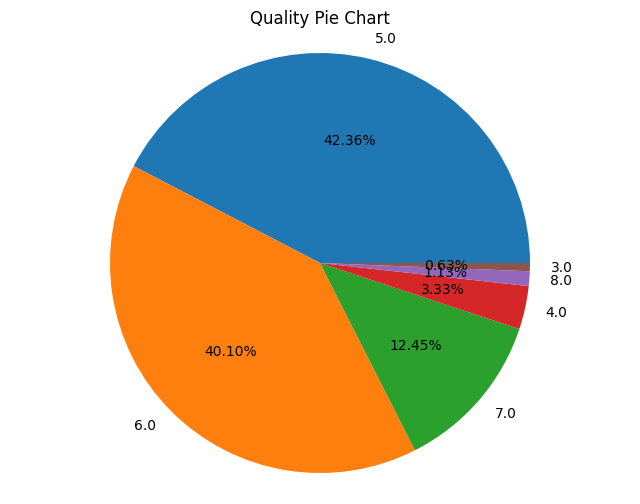

In [20]:
plt.figure(figsize=(8,6)) # set the figure size
quality_counts = df['quality'].value_counts()
plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.2f%%')
plt.title('Quality Pie Chart')
plt.axis('equal')
plt.show()

> ###  Scatterplot of pH vs chlorides

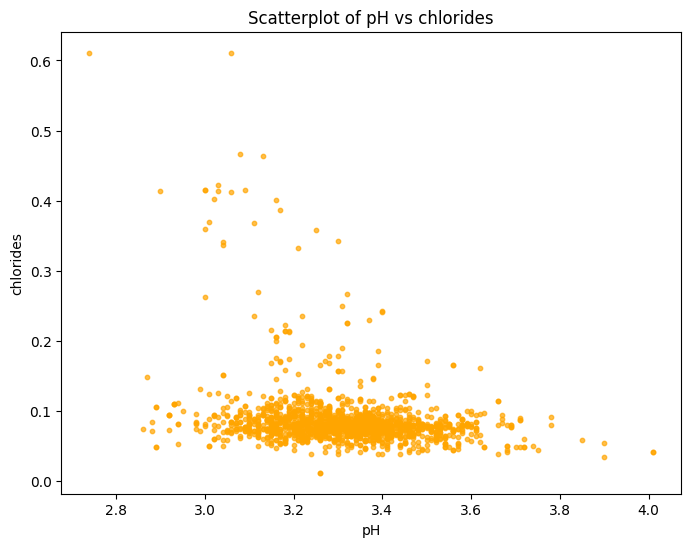

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x=df['pH'], y=df['chlorides'], s=10, c='orange', alpha=0.7)
plt.title('Scatterplot of pH vs chlorides')
plt.xlabel('pH')
plt.ylabel('chlorides')
plt.show()

> ### Heatmap of correlation matrix

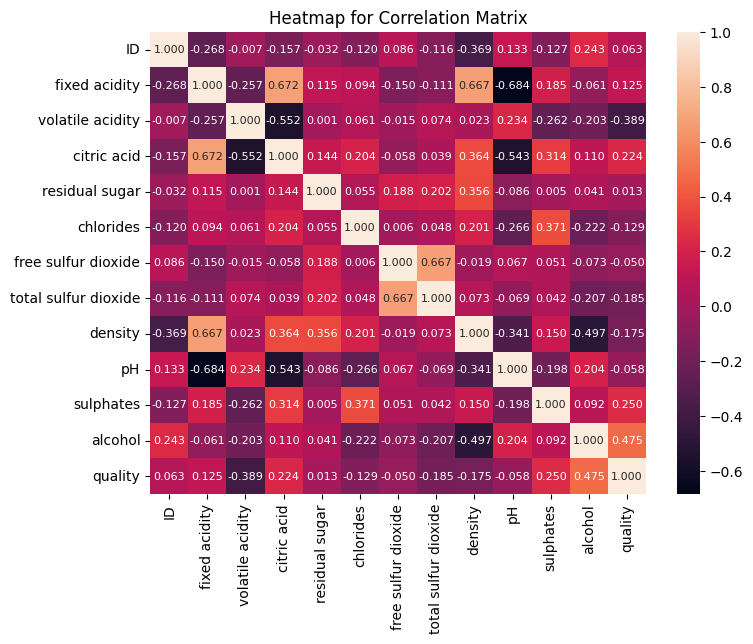

In [24]:
plt.figure(figsize=(8,6)) # set the figure size
sns.heatmap(data=df.corr(), annot=True, fmt='.3f', annot_kws={"size": 8}) # set the color map, annotation format and font size
plt.title('Heatmap for Correlation Matrix')
plt.show()

## In conclusion...
    exploratory data analysis plays a crucial role in the data analysis process as it uncovers patterns, trends, and relationships that may not be apparent at first glance. Through pre-processing the data and providing statistical inferences, we can reveal hidden insights and correlations between different columns, which can lead to more informed decision-making.